In [221]:
from mecab import MeCab
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
# from konlpy.tag import Okt
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter
from sklearn.model_selection import train_test_split
from hanspell import spell_checker
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)
%matplotlib inline

In [187]:
first_month = '과자가 먹고 싶은데 엄마가 못먹게햬. 너는 뭐하니? 그림 글이고 싶어 그런데이개 라이크'
second_month = '오늘 미술시간애 슬펐어. 친구가 내그림에 물을 튀겨서 망했어. 나는 미술을 좋아해 파넝버랴 카허아'
third_month = '친구들이 놀려. 자꾸 나보고 멍청하대 어이업지않니 ㄷ랼'

# Spelling Checker

In [195]:
class TextAnalyzer:
    def __init__(self):
        self.spell_checker = spell_checker

    def analyze(self, data):
        string = data
        result = self.spell_checker.check(string)
        
        len_sentence = len(string)
        error_count = result.as_dict()['errors']
        error_ratio = error_count / len_sentence
        
        return len_sentence, error_count, error_ratio

    def top_words(self, string, count):
        m = MeCab()

        NNG = []
        for i in m.pos(string):
            if i[1] == 'NNG':
                NNG.append(i)

        word_counts = Counter(word for word, _ in NNG)

        # 가장 많이 사용된 단어 count개 출력
        top_words = word_counts.most_common(count)

        return top_words

In [196]:
# Example usage:
analyzer = TextAnalyzer()
all_data = [first_month, second_month, third_month]


len_sentence_month, error_count_month, error_ratio_month, top_words_month = [], [], [], []


for data in all_data:
    len_sentence, error_count, error_ratio = analyzer.analyze(data)
    top_words = analyzer.top_words(data, 3)
    
    len_sentence_month.append(len_sentence)
    error_count_month.append(error_count)
    error_ratio_month.append(error_ratio)
    top_words_month.append(top_words)

In [197]:
len_sentence_month, error_count_month, error_ratio_month, top_words_month

([48, 54, 30],
 [4, 4, 2],
 [0.08333333333333333, 0.07407407407407407, 0.06666666666666667],
 [[('과자', 1), ('엄마', 1), ('그림', 1)],
  [('미술', 2), ('시간', 1), ('애', 1)],
  [('친구', 1), ('이업', 1), ('ㄷ', 1)]])

# Make Report

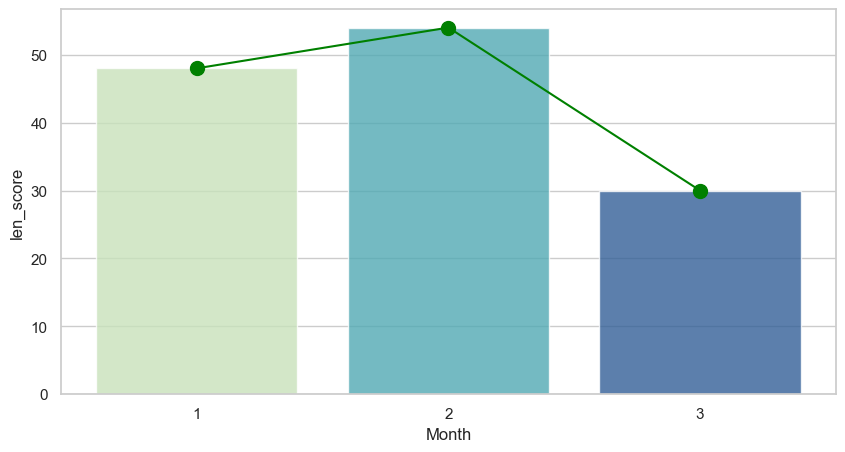

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize = (10,5))

x = [1,2,3]
y = len_sentence_month
prev_x, prev_y = None, None

sns.barplot(x = x, y=y, alpha=0.8, palette='YlGnBu')

for i, v in enumerate(y):
    plt.scatter(i, v, color='green', marker='o', s=100) 

        # Connect points with lines
    if prev_x is not None and prev_y is not None:
        plt.plot([prev_x, i], [prev_y, v], color='green', linestyle='-')  # Customize the line appearance

    # Update the previous coordinates
    prev_x, prev_y = i, v
    


plt.xlabel('Month')
plt.xticks(rotation=0)
plt.ylabel('len_score')
plt.savefig('one.jpg')
plt.show()

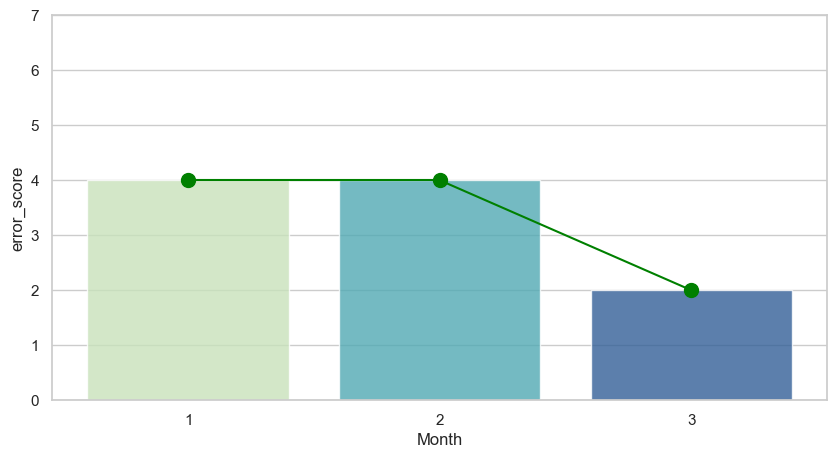

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize = (10,5))

x = [1,2,3]
y = error_count_month
prev_x, prev_y = None, None

sns.barplot(x = x, y=y, alpha=0.8, palette='YlGnBu')

plt.ylim(0, 7)

for i, v in enumerate(y):
    plt.scatter(i, v, color='green', marker='o', s=100) 

        # Connect points with lines
    if prev_x is not None and prev_y is not None:
        plt.plot([prev_x, i], [prev_y, v], color='green', linestyle='-')  # Customize the line appearance

    # Update the previous coordinates
    prev_x, prev_y = i, v
    


plt.xlabel('Month')
plt.xticks(rotation=0)
plt.ylabel('error_score')
plt.savefig('two.jpg')
plt.show()

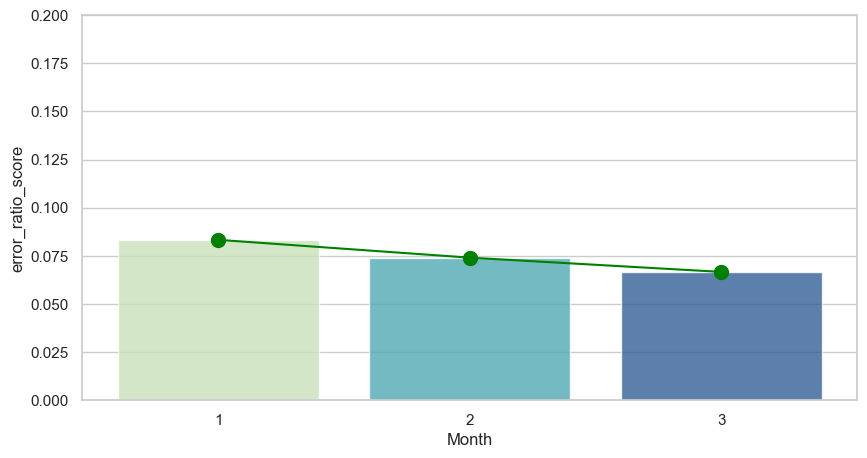

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize = (10,5))

x = [1,2,3]
y = error_ratio_month
prev_x, prev_y = None, None

sns.barplot(x = x, y=y, alpha=0.8, palette='YlGnBu')

plt.ylim(0, 0.2)

for i, v in enumerate(y):
    plt.scatter(i, v, color='green', marker='o', s=100) 
        # Connect points with lines
    if prev_x is not None and prev_y is not None:
        plt.plot([prev_x, i], [prev_y, v], color='green', linestyle='-')  # Customize the line appearance

    # Update the previous coordinates
    prev_x, prev_y = i, v
    


plt.xlabel('Month')
plt.xticks(rotation=0)
plt.ylabel('error_ratio_score')
plt.savefig('three.jpg')
plt.show()

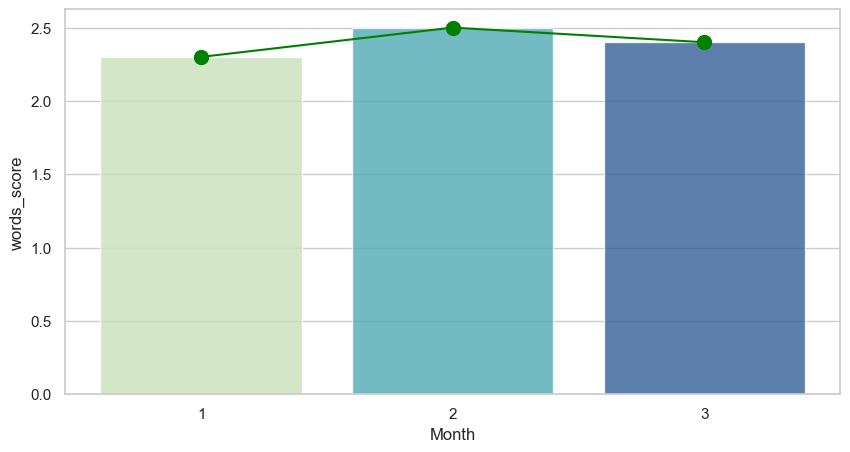

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize = (10,5))

x = [1,2,3]
y = [2.3, 2.5, 2.4]
prev_x, prev_y = None, None

sns.barplot(x = x, y=y, alpha=0.8, palette='YlGnBu')


for i, v in enumerate(y):
    plt.scatter(i, v, color='green', marker='o', s=100) 
        # Connect points with lines
    if prev_x is not None and prev_y is not None:
        plt.plot([prev_x, i], [prev_y, v], color='green', linestyle='-')  # Customize the line appearance

    # Update the previous coordinates
    prev_x, prev_y = i, v
    


plt.xlabel('Month')
plt.xticks(rotation=0)
plt.ylabel('words_score')
plt.savefig('four.jpg')
plt.show()